<a href="https://colab.research.google.com/github/sarathkumar1304/Breast-cancer-prediction/blob/main/Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv("cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
df.shape

(569, 33)

In [20]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [21]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [22]:
del df['Unnamed: 32']

In [23]:
del df['id']

In [24]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
df=df.drop_duplicates()

In [26]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [27]:
df['diagnosis']=df['diagnosis'].map({"M":1,"B":0})

In [28]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [31]:
x_train.shape,x_test.shape

((455, 30), (114, 30))

# DECISION TREE FITTING


In [32]:
#import model
from sklearn.tree import DecisionTreeClassifier
#intializing the model
dt=DecisionTreeClassifier()
#fitting the model
dt.fit(x_train,y_train)
#predicting the model
y_pred=dt.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0])

In [33]:
from sklearn.metrics import RocCurveDisplay

Test set accuracy:0.90

Test set AUC score: 0.91

ROC CURVE OF THE MODEL



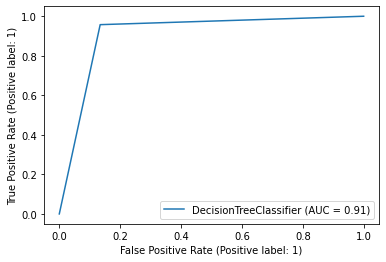

In [34]:
from sklearn.metrics import accuracy_score, roc_auc_score
y_pred=dt.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Test set accuracy:{:.2f}".format(acc))
print()
auc=roc_auc_score(y_test,y_pred)
print("Test set AUC score: {:.2f}".format(auc))
print()
print("ROC CURVE OF THE MODEL")
print()
RocCurveDisplay.from_estimator(dt,x_test,y_test)

REDUCING OVERFITTING

In [35]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [36]:
for i in [1,2,3,4,5,6,7,8,9,10,20]:
  dt=DecisionTreeClassifier(max_depth=i)
  dt.fit(x_train,y_train)
  train_accuracy=accuracy_score(y_train,dt.predict(x_train))
  val_accuracy=cross_val_score(dt,x_train,y_train,cv=10)
  print("Depth :", i,"Training Accuracy :",train_accuracy,"Cross val score :",np.mean(val_accuracy))

Depth : 1 Training Accuracy : 0.9230769230769231 Cross val score : 0.883671497584541
Depth : 2 Training Accuracy : 0.9516483516483516 Cross val score : 0.9254589371980677
Depth : 3 Training Accuracy : 0.9714285714285714 Cross val score : 0.9276811594202898
Depth : 4 Training Accuracy : 0.9846153846153847 Cross val score : 0.9385507246376811
Depth : 5 Training Accuracy : 0.989010989010989 Cross val score : 0.9451207729468599
Depth : 6 Training Accuracy : 0.9934065934065934 Cross val score : 0.9298067632850241
Depth : 7 Training Accuracy : 0.9956043956043956 Cross val score : 0.9429468599033817
Depth : 8 Training Accuracy : 0.9978021978021978 Cross val score : 0.936280193236715
Depth : 9 Training Accuracy : 1.0 Cross val score : 0.9209661835748794
Depth : 10 Training Accuracy : 1.0 Cross val score : 0.9342028985507247
Depth : 20 Training Accuracy : 1.0 Cross val score : 0.9276811594202898


By above training accuracy and cross validation score I choose **Max_depth** =4 because cross validation score is high in **depth 4**

In [37]:
data=pd.read_csv("cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [38]:
del data['id']
del data['Unnamed: 32']

In [39]:
data['diagnosis']=data['diagnosis'].map({"M":1,"B":0})

In [40]:
data["perimeter_worst"]

0      184.60
1      158.80
2      152.50
3       98.87
4      152.20
        ...  
564    166.10
565    155.00
566    126.70
567    184.60
568     59.16
Name: perimeter_worst, Length: 569, dtype: float64

In [41]:
x=data[['perimeter_worst','texture_worst','concave points_worst','compactness_se','texture_mean','concave points_mean','smoothness_mean','area_se','area_worst']]
y=data.iloc[:,0]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(x_train,y_train)
#imp=dt.feature_importances_
#list(zip(imp,x_test.columns))
#['perimeter_worst','texture_worst','concave points_worst','compactness_se','texture_mean','concave points_mean','smoothness_mean','area_se','area_worst']

DecisionTreeClassifier(max_depth=4)

In [43]:
y_pred=dt.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0])

In [44]:
dt.predict_proba(x_test)

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

In [45]:
x_test.iloc[1,:].values

array([1.028e+02, 2.795e+01, 2.088e-01, 2.336e-02, 1.866e+01, 7.340e-02,
       1.158e-01, 2.425e+01, 7.594e+02])

In [46]:
dt.predict([[1.028e+02, 2.795e+01, 2.088e-01, 2.336e-02, 1.866e+01, 7.340e-02,
       1.158e-01, 2.425e+01, 7.594e+02]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

[Text(0.4791666666666667, 0.9, 'x[0] <= 106.05\ngini = 0.468\nsamples = 455\nvalue = [285, 170]'),
 Text(0.2708333333333333, 0.7, 'x[2] <= 0.159\ngini = 0.064\nsamples = 271\nvalue = [262, 9]'),
 Text(0.16666666666666666, 0.5, 'x[2] <= 0.135\ngini = 0.03\nsamples = 265\nvalue = [261, 4]'),
 Text(0.08333333333333333, 0.3, 'x[7] <= 48.975\ngini = 0.008\nsamples = 254\nvalue = [253, 1]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.0\nsamples = 251\nvalue = [251, 0]'),
 Text(0.125, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.25, 0.3, 'x[4] <= 20.84\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.5, 'x[4] <= 16.22\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0

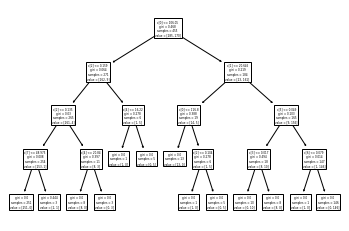

In [47]:
from sklearn import tree
tree.plot_tree(dt)

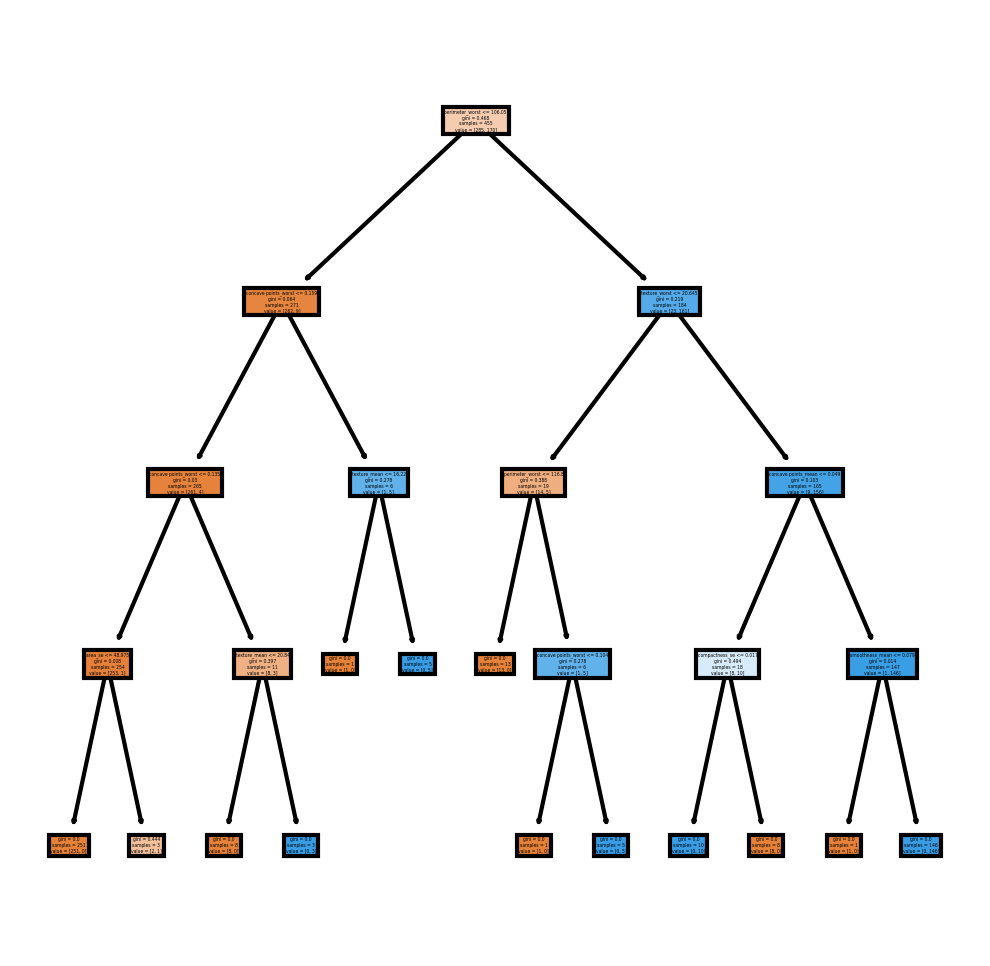

In [48]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = x_test.columns,
               filled = True);
fig.savefig('imagename.png')

In [49]:
dt.predict_proba(x_test)

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

### Get the values  of 1st row to predict

In [50]:
x_test.iloc[5,:].values

array([1.297e+02, 3.168e+01, 1.312e-01, 1.952e-02, 2.154e+01, 5.613e-02,
       1.008e-01, 4.368e+01, 1.175e+03])

Predict

In [55]:
predict=dt.predict([[1.297e+02, 3.168e+01, 1.312e-01, 1.952e-02, 2.154e+01, 5.613e-02,
       1.008e-01, 4.368e+01, 1.175e+03]])
print(predict)
if predict==1:
  print("M")
else:
  print("B")

[1]
M


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
